In [1]:
import cv2
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import math
from tensorflow.keras import backend as K

ModuleNotFoundError: No module named 'cv2'

In [5]:
np.random.seed(7)

In [6]:
plain_datagen = ImageDataGenerator()
scaled_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
hr_image_raw_dict = {}
lr_image_raw_dict = {}




def load_images(standardize= False, resize = False, resize_width = None, resize_height = None):
    hr_image_list = glob.glob('../ML-project/Data/HR/*')
    
    for i in tqdm(hr_image_list):
        filename_wo_ext = i.split('/')[-1].split('.')[0]
        
        if resize:
            hr_image_raw_dict[filename_wo_ext] = cv2.resize(cv2.imread(i),fx = resize_height,
                                                           fy = resize_width)
        else:
            
            hr_image_raw_dict[filename_wo_ext] = cv2.imread(i)
        
        if standardize:
            hr_image_raw_dict[filename_wo_ext] = hr_image_raw_dict[filename_wo_ext]/255.0 
            
            
        
        
    lr_image_list = glob.glob('../ML-project/Data/LR/*')
    
    for i in tqdm(lr_image_list):
        filename_wo_ext = i.split('/')[-1].split('.')[0]
        if resize:
            lr_image_raw_dict[filename_wo_ext] = cv2.resize(cv2.imread(i),fx = resize_height,
                                                           fy = resize_width)
        else:
            
            lr_image_raw_dict[filename_wo_ext] = cv2.imread(i)
        #lr_image_raw_dict[filename_wo_ext] = cv2.imread(i)    
        
        if standardize:
            lr_image_raw_dict[filename_wo_ext] = lr_image_raw_dict[filename_wo_ext]/255.0 
            
        
    return hr_image_raw_dict, lr_image_raw_dict   

In [8]:
hr_image_raw_dict, lr_image_raw_dict = load_images(standardize = False, resize = False, resize_width = None, resize_height = None)


100%|██████████| 100/100 [00:00<00:00, 2382.94it/s]


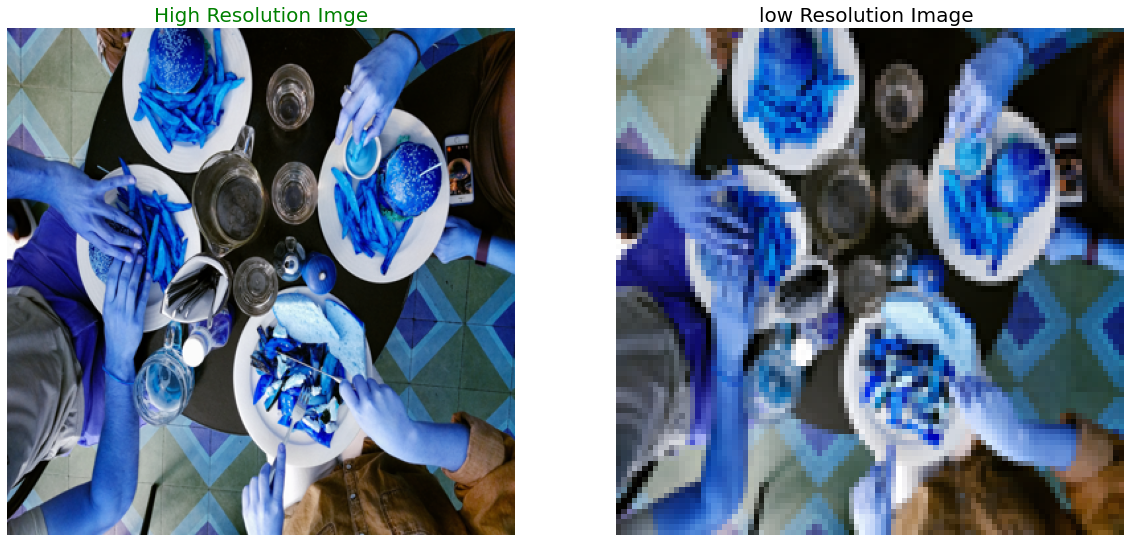

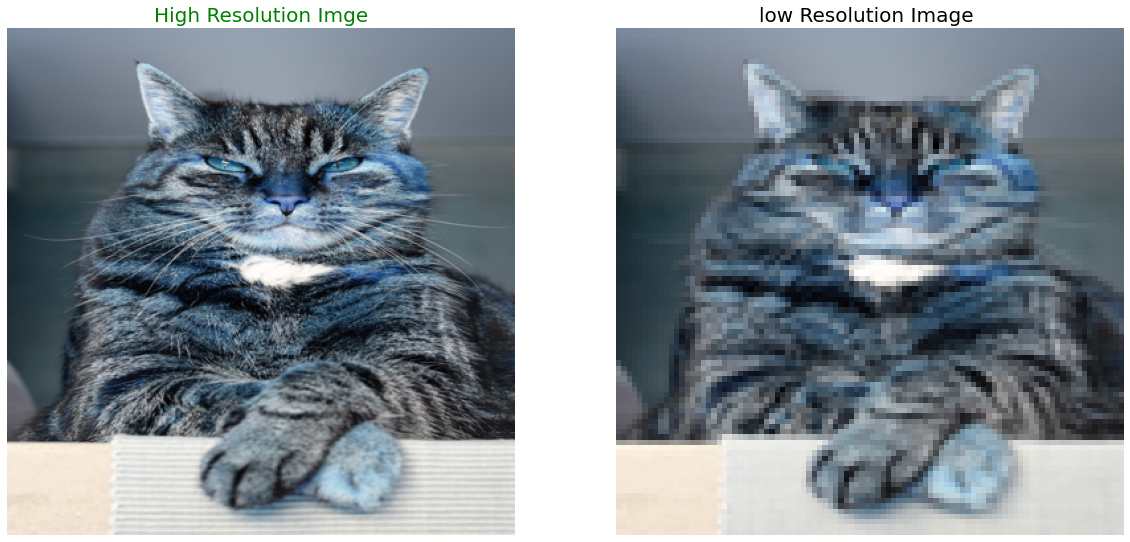

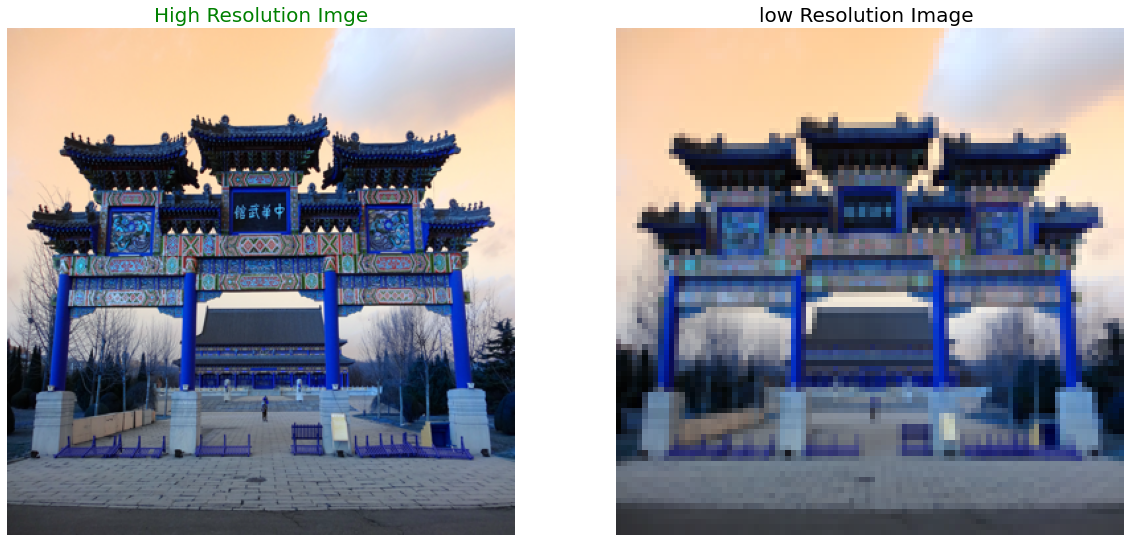

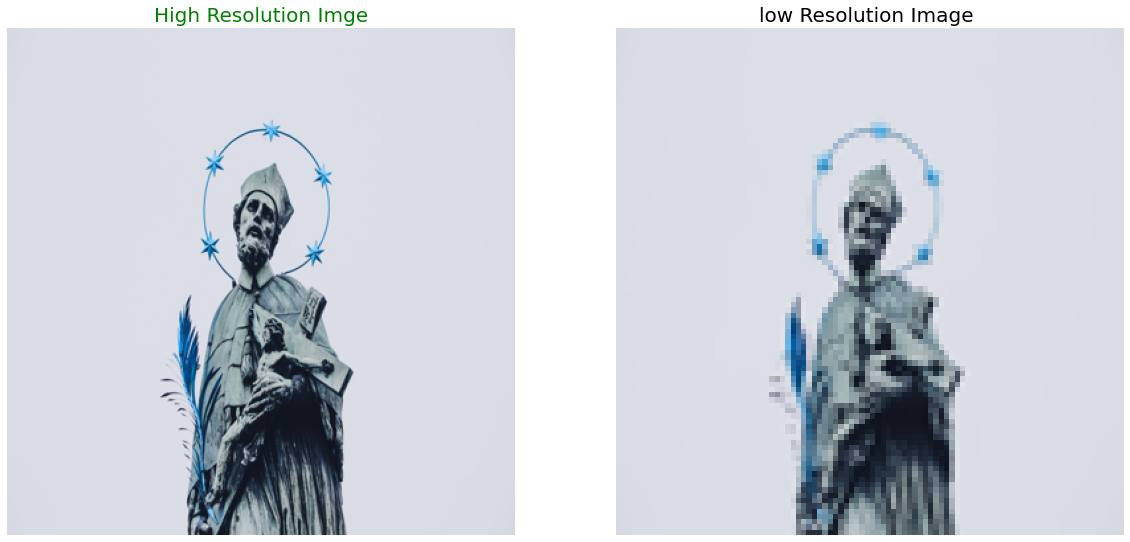

In [9]:
for i in range(4):
    a = str(np.random.randint(0,99))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(hr_image_raw_dict[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(lr_image_raw_dict[a])
    plt.axis('off')

In [10]:
lr_image_raw_dict[a].shape

(96, 96, 3)

In [11]:
hr_image_raw_dict[a].shape

(384, 384, 3)

In [12]:
def model_train_plot(history):
    
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    

    plt.plot(history.history['SSIM'])
    plt.plot(history.history['val_SSIM'])
    plt.title('model SSIM')
    plt.ylabel('SSIM')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['PSNR'])
    plt.plot(history.history['val_PSNR'])
    plt.title('model PSNR')
    plt.ylabel('PSNR')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [13]:
def build_model():
    model = keras.Sequential()
    model.add(keras.Input(shape = (96,96,3)))
    model.add(layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same', strides = 1,activation='relu'))
    model.add(layers.Conv2D(filters = 64, kernel_size= 3, padding = 'same', activation='relu'))
    model.add(layers.Conv2D(filters = 128, kernel_size= 9, padding = 'same', activation='relu' ))
    model.add(layers.Conv2D(filters = 64, kernel_size= 9, padding = 'same', activation='relu'))
    model.add(layers.UpSampling2D(size = (2,2)))
    model.add(layers.Conv2D(filters = 64, kernel_size= 3, padding = 'same', activation='relu'))
    model.add(layers.Conv2D(filters = 128, kernel_size= 9, padding = 'same', activation='relu'))
    model.add(layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same', activation='relu'))
    model.add(layers.Conv2D(filters = 32, kernel_size= 3, padding = 'same', activation='relu'))
    model.add(layers.UpSampling2D(size = (2,2)))
    model.add(layers.Dense(3, activation="relu"))
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(optimizer = opt, loss = 'MSE', metrics = [PSNR, 'accuracy', SSIM])
    model.summary()

In [ ]:
class eegConv1d(nn.Module):
    def __init__(self, input_size = 1, hidden_size=32, out_size=7):
        super().__init__()
        self.conv1d   = nn.Conv1d(input_size, hidden_size, kernel_size = 3,stride =1 )
        self.linear = nn.Linear(36416, out_size) 
        
    def forward(self, seq):
        out = self.conv1d(seq) 
        out = out.reshape(-1,36416)
        out = self.linear(out)
        return out
        

In [ ]:
class CNNModel(nn.Module):
    def __init__(self,input_size=1,hidden_size,output_size):
        super().init

In [14]:
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303

def SSIM(y_true, y_pred):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))

In [15]:
x_train = lr_image_raw_dict.values()
y_train = hr_image_raw_dict.values()
x_train = np.array(list(x_train))
y_train = np.array(list(y_train))

train_iterator_plain = plain_datagen.flow(x_train, y_train, batch_size=2)
print(train_iterator_plain)
model = build_model()

model.fit(train_iterator_plain, batch_size=2, epochs=2000, verbose= 0 )

#earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
#history = model.fit(x_train, y_train, batch_size=2, epochs=200, verbose= 0,callbacks=[earlystop_callback], validation_split = 0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 128)       663680    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        663616    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 192, 192, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 192, 192, 64)      36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 192, 192, 128)     6

AttributeError: 'NoneType' object has no attribute 'fit'

In [ ]:
#model.fit(train_iterator_plain, batch_size=2, epochs=2000, verbose= 0 )

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

history = model.fit(x_train, y_train, batch_size=2, epochs=200, verbose= 0,
                   callbacks=[earlystop_callback], validation_split = 0.2)